## Ejemplo 4: Scatterplots con variables condicionantes

### 1. Objetivos:
    - Aprender a generar e interpretar scatterplots con variables condicionantes
 
---
    
### 2. Desarrollo:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Datasets/athlete_olympic_events-clean.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


Por ejemplo, digamos que queremos visualizar las diferencias de peso y altura que hay entre los atletas que juegan basketball, volleyball, football y beisball:

In [3]:
df_grouped = df.groupby('name')[['height', 'weight', 'sport']].max()

In [4]:
df_ball = df_grouped[df_grouped['sport'].isin(['Basketball', 'Volleyball', 'Football', 'Baseball'])]

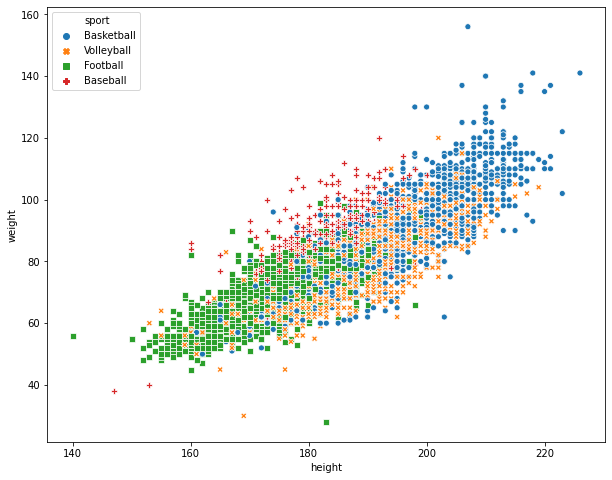

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sns.scatterplot(df_ball['height'], df_ball['weight'], hue=df_ball['sport'], style=df_ball['sport'], ax=ax);

Utilizando este scatterplot por categorías ya podemos darnos una idea de las diferencias. Pero hay cierta confusión en la parte central de la gráfica donde están concentrados todos los deportes. Es difícil diferenciar los puntos cuando hay aglomeraciones tan grandes. Podemos entonces generar un scatterplot con variables condicionantes para ayudarnos:

In [8]:
basket = df_ball[df_ball['sport'] == 'Basketball']
volley = df_ball[df_ball['sport'] == 'Volleyball']
foot = df_ball[df_ball['sport'] == 'Football']
base = df_ball[df_ball['sport'] == 'Baseball']

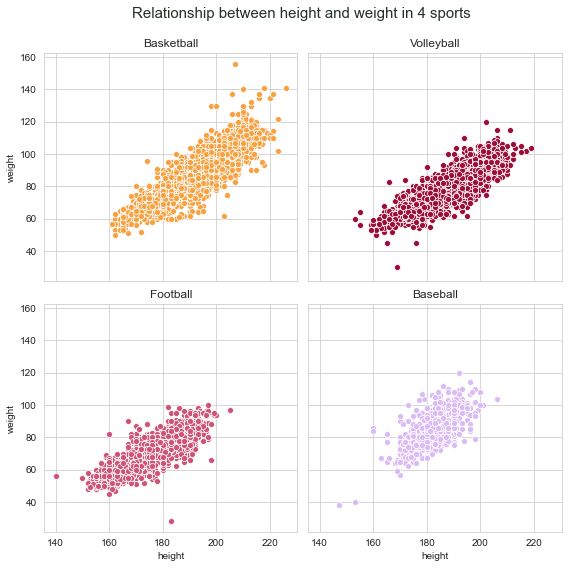

In [17]:
sns.set_style('whitegrid')
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5","#F9A03F"]

fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(2, 2, sharex=True, sharey=True)

sns.scatterplot(basket['height'], basket['weight'], ax=axes[0, 0], color=palette[4])
sns.scatterplot(volley['height'], volley['weight'], ax=axes[0, 1], color=palette[1])
sns.scatterplot(foot['height'], foot['weight'], ax=axes[1, 0], color=palette[2])
sns.scatterplot(base['height'], base['weight'], ax=axes[1, 1], color=palette[3]);

axes[0, 0].set_title('Basketball')
axes[0, 1].set_title('Volleyball')
axes[1, 0].set_title('Football')
axes[1, 1].set_title('Baseball')

fig.suptitle('Relationship between height and weight in 4 sports', fontsize=15, c=palette[0], x=0.53)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

¡Genial¡ Ahora sí tenemos mucha más claridad acerca de cómo están repartidos los atletas que juegan estos 4 deportes. Podemos ver que cada deporte tiene ciertas tendencias muy claras. Aunque hay mucha superposición, hay diferencias claras.